https://github.com/Obanla/Building-a-Movie-Recommendation-System-Using-Flask-Docker-Container-and-Machine-Learning

In [1]:
#Importing the required libraries
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# !pip install numpy==1.24.4
import numpy as np
print(np.__version__)

2.0.2


In [3]:
#Load and read the dataset for the movies and the movie credits
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

<ipython-input-3-e140d60aed8b>:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

In [4]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
credits.head(10)

,movie_id,title,cast,crew,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(f'The movies dataset has {movies.shape[0]} rows and {movies.shape[1]} columns')
print (f'The credits dataset has {credits.shape[0]} rows and {credits.shape[1]} columns')

The movies dataset has 4803 rows and 20 columns
The credits dataset has 3863 rows and 1265 columns


In [7]:
# merge both dataframes using the title
movies = pd.merge(movies, credits, on='title')

In [8]:
#check for empty columns in the movies and credits dataset
print(f' In the movies dataset these rows have empty values:\n{movies.isnull().sum()}')

 In the movies dataset these rows have empty values:
budget              0
genres              0
homepage          793
id                  0
keywords            0
                 ... 
Unnamed: 1260    1492
Unnamed: 1261    1492
Unnamed: 1262    1492
Unnamed: 1263    1492
Unnamed: 1264    1492
Length: 1284, dtype: int64


In [9]:
#Drop columns in movies and credits if more than 90% of the rows in columns are missing
movies.dropna(thresh=movies.shape[0]*0.95, axis=1, inplace=True)

In [10]:
movies.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [11]:
#Drop rows in the tagline and crew column that are missing
movies.dropna(subset=['crew'], inplace=True)


In [12]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')

In [13]:
#Check if there are no more missin rows in the dataframe
movies.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [14]:
movies.tail()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew
1487,30000000,"[{""id"": 18, ""name"": ""Drama""}]",9763,"[{""id"": 1946, ""name"": ""restaurant""}, {""id"": 60...",en,Goal!: The Dream Begins,"Like millions of kids around the world, Santia...",16.541791,"[{""name"": ""Touchstone Pictures"", ""id"": 9195}, ...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,27610873,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Goal!: The Dream Begins,6.6,238,9763.0,"[{""cast_id"": 1, ""character"": ""Santiago Munez"",...","[{""credit_id"": ""52fe4528c3a36847f80bfa1d"", ""de..."
1488,30000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",72387,"[{""id"": 180366, ""name"": ""broken trachea""}]",en,Safe,After a former elite agent rescues a 12-year-o...,31.926950,"[{""name"": ""Lawrence Bender Productions"", ""id"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,40346186,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Safe,6.3,799,72387.0,"[{""cast_id"": 3, ""character"": ""Luke Wright"", ""c...","[{""credit_id"": ""52fe4868c3a368484e0f716d"", ""de..."
1489,33000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",12596,"[{""id"": 271, ""name"": ""competition""}, {""id"": 82...",en,Pushing Tin,"Two air traffic controllers (John Cusack, Bill...",9.060642,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",...,0,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pushing Tin,5.7,116,12596.0,"[{""cast_id"": 1, ""character"": ""Nick Falzone"", ""...","[{""credit_id"": ""52fe45039251416c75048bc1"", ""de..."
1490,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",...,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,The Host,6.7,537,72710,"[{""cast_id"": 52, ""character"": ""Melanie Stryder...","[{""credit_id"": ""52fe487bc3a368484e0fa919"", ""de..."
1491,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman,6.1,203,268.0,"[{""cast_id"": 5, ""character"": ""Jack Napier/The ...","[{""credit_id"": ""52fe422fc3a36847f800aa4b"", ""de..."


In [15]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')

In [16]:
#Drop any column that will not be used in building the content based filtering and collaborative filtering models for the recommendation system
# Keep important columns
movies = movies[['genres', 'id', 'keywords', 'original_language', 'overview', 'release_date', 'runtime', 'title', 'vote_average', 'vote_count', 'cast', 'crew']]

In [17]:
#View the created dataframe, with the selected columns

movies.head()

,genres,id,keywords,original_language,overview,release_date,runtime,title,vote_average,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,2015-10-26,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,2012-07-16,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",2012-03-07,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
# Checking to see the range of vote_average column
movies['vote_average'].describe()

,vote_average
count,1489.000000
mean,6.183412
std,0.821379
min,0.000000
25%,5.700000
50%,6.200000
75%,6.700000
max,8.300000


#We know when determining quality movies, we need to know the number of votes, if a movie has 2 votes with high ratings it could be miss leading. For this we need the vote_average and vote_count columns



In [19]:
#Group ratings for example 0-0.99 is 0, 1-1.99 is 1
movies['rating_group'] = movies['vote_average'].apply(lambda x: int(x))



In [20]:
movies

,genres,id,keywords,original_language,overview,release_date,runtime,title,vote_average,vote_count,cast,crew,rating_group
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,2015-10-26,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,2012-07-16,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",2012-03-07,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,"[{""id"": 18, ""name"": ""Drama""}]",9763,"[{""id"": 1946, ""name"": ""restaurant""}, {""id"": 60...",en,"Like millions of kids around the world, Santia...",2005-06-06,118.0,Goal!: The Dream Begins,6.6,238,"[{""cast_id"": 1, ""character"": ""Santiago Munez"",...","[{""credit_id"": ""52fe4528c3a36847f80bfa1d"", ""de...",6
1488,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",72387,"[{""id"": 180366, ""name"": ""broken trachea""}]",en,After a former elite agent rescues a 12-year-o...,2012-04-16,94.0,Safe,6.3,799,"[{""cast_id"": 3, ""character"": ""Luke Wright"", ""c...","[{""credit_id"": ""52fe4868c3a368484e0f716d"", ""de...",6
1489,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",12596,"[{""id"": 271, ""name"": ""competition""}, {""id"": 82...",en,"Two air traffic controllers (John Cusack, Bill...",1999-04-23,124.0,Pushing Tin,5.7,116,"[{""cast_id"": 1, ""character"": ""Nick Falzone"", ""...","[{""credit_id"": ""52fe45039251416c75048bc1"", ""de...",5
1490,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,Gang-du is a dim-witted man working at his fat...,2006-07-27,119.0,The Host,6.7,537,"[{""cast_id"": 52, ""character"": ""Melanie Stryder...","[{""credit_id"": ""52fe487bc3a368484e0fa919"", ""de...",6


In [21]:
# Count the frequency of each rating in the movie rating dataset
ratings_count = movies['rating_group'].value_counts()
print(ratings_count)

rating_group
6    639
5    487
7    262
4     77
8     14
3      8
2      1
0      1
Name: count, dtype: int64


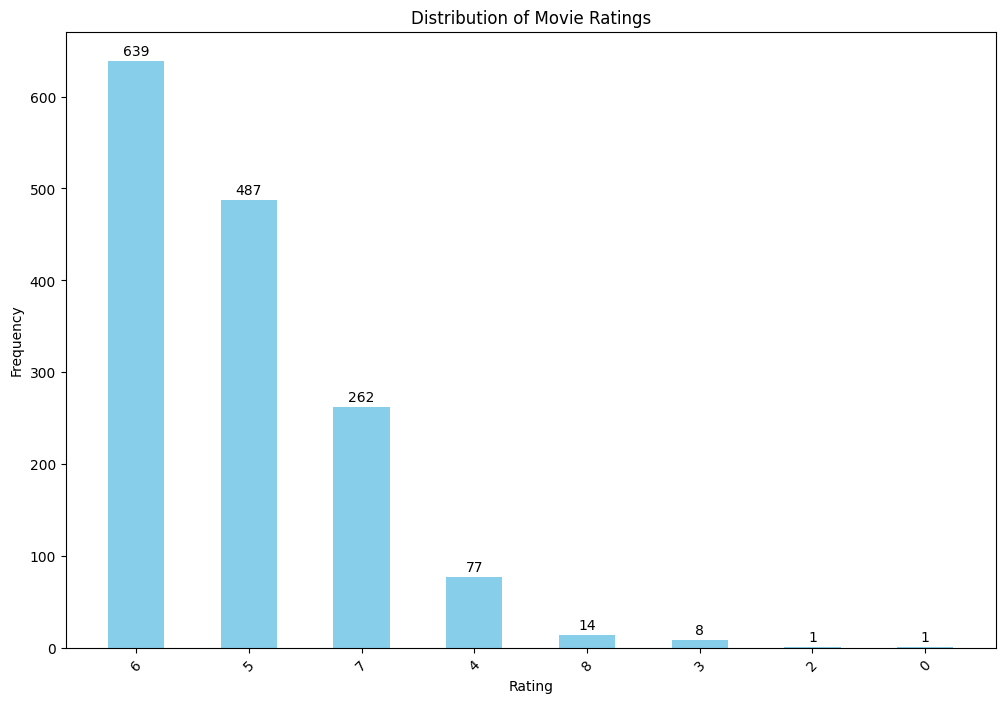

In [22]:
#Now we can conviniently check the frequency of ratings by plotting a graph

x_pos = np.arange(len(ratings_count))
plt.figure(figsize=(12, 8))
bars = plt.bar(x_pos, ratings_count.values, width=0.5, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(x_pos, ratings_count.index, rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, str(yval), ha='center', va='bottom')
plt.show()

In [23]:
# Calculate the average rating for each movie
average_ratings = movies.groupby('id')['rating_group'].mean()
print(average_ratings)

id
12        7.0
13        8.0
18        7.0
22        7.0
24        7.0
         ... 
336004    5.0
347969    4.0
365222    6.0
381902    6.0
417859    6.0
Name: rating_group, Length: 1489, dtype: float64


In [24]:
movie_stats = movies.groupby('id').agg(
    mean=('rating_group', 'mean'),
    vote_count=('vote_count', 'sum'))

In [25]:
movie_stats

,mean,vote_count
id,,
12,7.0,6122
13,8.0,7927
18,7.0,3885
22,7.0,6985
24,7.0,4949
...,...,...
336004,5.0,318
347969,4.0,388
365222,6.0,379


In [26]:
# Find the movies with the top 20 highest ratings
top_20_movies = movie_stats.sort_values(by='mean', ascending=False).head(20)
top_20_movies

,mean,vote_count
id,,
27205,8.0,13752
550,8.0,9413
155,8.0,12002
122,8.0,8064
120,8.0,8705
161795,8.0,1
497,8.0,4048
13,8.0,7927
423,8.0,1864


# **FROM THE ABOVE, IT IS CLEAR THAT THE TOP MOVIES Have only one vote count, so if we build a recommendation system, based off this, it will be wrong. Now let's add weighting to see which movies truly deserve the top spot**

In [27]:
ratings_count_per_movie = movies.groupby('id')['vote_count'].first()

In [28]:
m = ratings_count_per_movie.quantile(0.90)
m

np.float64(3536.2000000000016)

In [29]:
# Calculate the average rating across all movies (C)
C = movies['rating_group'].mean()


In [30]:
#Retrieve the number of ratings for the movies with the top 20 ratings when we apply weighting to the average rating per movie

# Apply the weighted rating formula
movie_stats['weighted_rating'] = (
    (movie_stats['vote_count'] / (movie_stats['vote_count'] + m) * movie_stats['mean']) +
    (m / (movie_stats['vote_count'] + m) * C)
)


In [31]:
movie_stats

,mean,vote_count,weighted_rating
id,,,
12,7.0,6122,6.539197
13,8.0,7927,7.303272
18,7.0,3885,6.400295
22,7.0,6985,6.576994
24,7.0,4949,6.475495
...,...,...,...
336004,5.0,318,5.680263
347969,4.0,388,5.569255
365222,6.0,379,5.766467


In [32]:
#Find the top 20 movies with the highest weighted average rating
top_20_by_weighted_average = movie_stats.nlargest(20, 'weighted_rating')
top_20_by_weighted_average

,mean,vote_count,weighted_rating
id,,,
27205,8.0,13752,7.538024
155,8.0,12002,7.485994
157336,8.0,10867,7.445489
550,8.0,9413,7.383226
120,8.0,8705,7.347553
122,8.0,8064,7.311501
13,8.0,7927,7.303272
121,8.0,7487,7.275462
150540,8.0,6560,7.208937


In [33]:
wa_ids = top_20_by_weighted_average.index.tolist()
sa_ids = top_20_movies.index.tolist()

In [34]:
wa_df = pd.DataFrame({'id': wa_ids, 'wa_position': range(1, 21)})
sa_df = pd.DataFrame({'id': sa_ids, 'sa_position': range(1, 21)})

In [35]:
comparison = pd.merge(wa_df, sa_df, on='id', how='outer')

In [36]:
comparison['in_both'] = comparison['wa_position'].notna() & comparison['sa_position'].notna()

In [37]:
comparison = comparison.sort_values(by=['wa_position', 'sa_position'], na_position='last')
print(comparison)

        id  wa_position  sa_position  in_both
15   27205          1.0          1.0     True
4      155          2.0          3.0     True
24  157336          3.0         13.0     True
7      550          4.0          2.0     True
1      120          5.0          5.0     True
3      122          6.0          4.0     True
0       13          7.0          8.0     True
2      121          8.0         14.0     True
23  150540          9.0         11.0     True
10    8587         10.0         10.0     True
9     1124         11.0         12.0     True
6      497         12.0          7.0     True
13   19995         13.0          NaN    False
14   24428         14.0          NaN    False
26  293660         15.0          NaN    False
19   68718         16.0         17.0     True
22  118340         17.0          NaN    False
21   76341         18.0          NaN    False
16   49026         19.0          NaN    False
8      603         20.0          NaN    False
25  161795          NaN          6

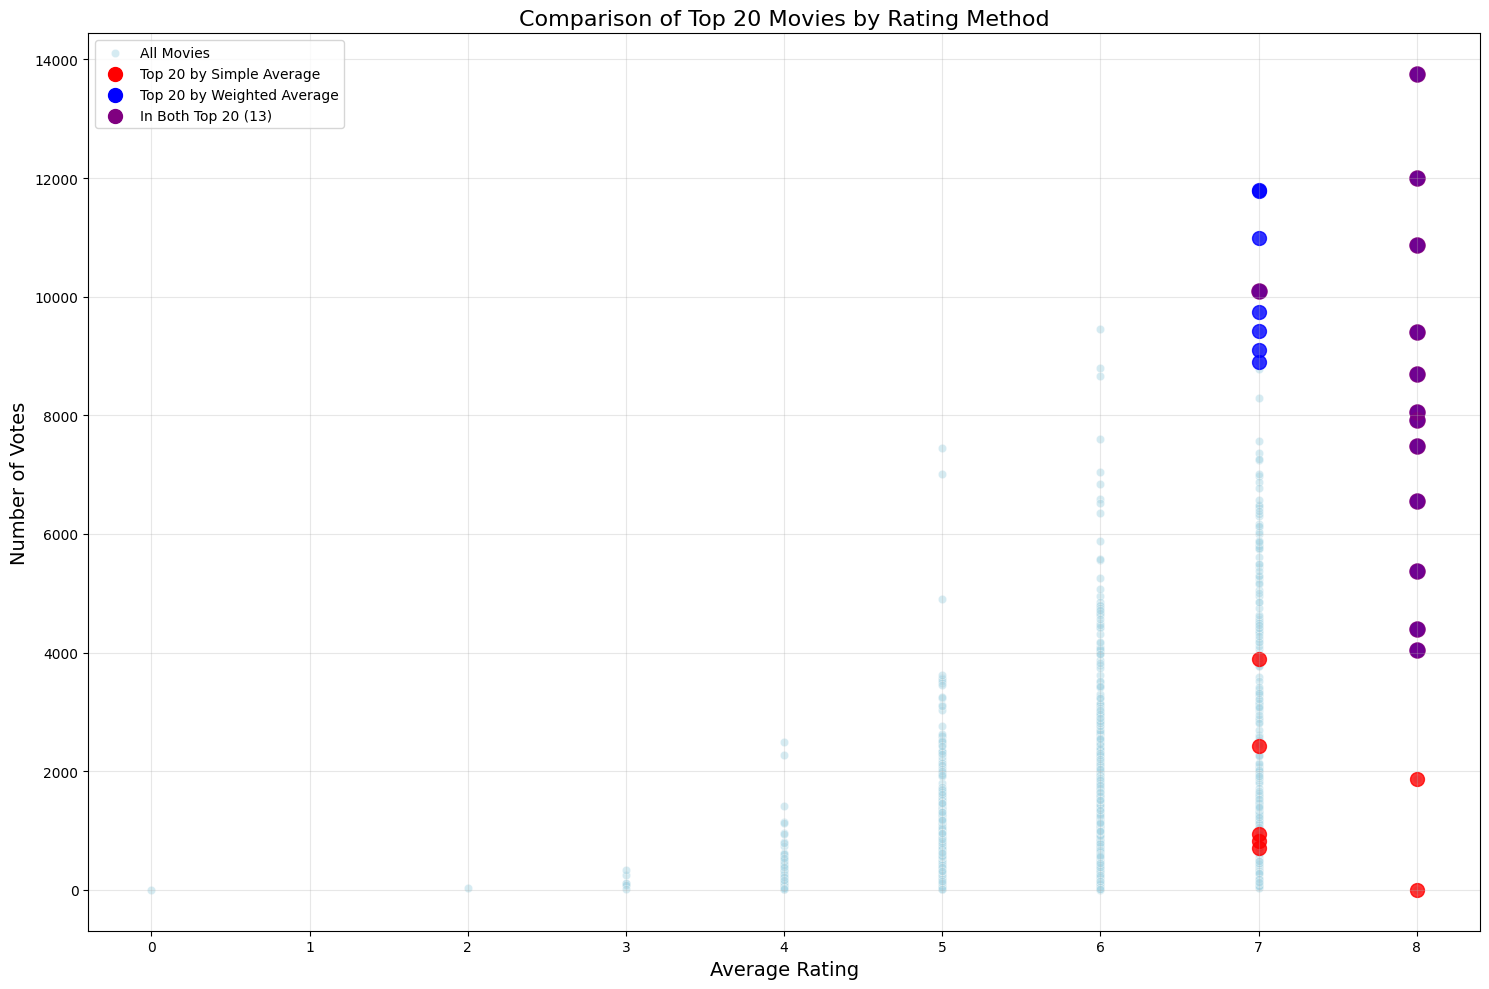

In [38]:
# Create the plot
plt.figure(figsize=(15, 10))

# Plot all movies
sns.scatterplot(
    x=movie_stats['mean'],
    y=movie_stats['vote_count'],  # Use your vote_count column
    color='lightblue',
    alpha=0.5,
    label='All Movies'
)

# Highlight top 20 by simple average (red)
for movie_id in top_20_movies.index:
    plt.scatter(
        movie_stats.loc[movie_id, 'mean'],
        movie_stats.loc[movie_id, 'vote_count'],
        color='red',
        s=100,
        alpha=0.8
    )
# Add a representative point for the legend
plt.scatter([], [], color='red', s=100, label='Top 20 by Simple Average')

# Highlight top 20 by weighted average (blue)
for movie_id in top_20_by_weighted_average.index:
    plt.scatter(
        movie_stats.loc[movie_id, 'mean'],
        movie_stats.loc[movie_id, 'vote_count'],
        color='blue',
        s=100,
        alpha=0.8
    )
# Add a representative point for the legend
plt.scatter([], [], color='blue', s=100, label='Top 20 by Weighted Average')

# Any movies in both lists get highlighted in purple
overlap = set(top_20_movies.index).intersection(set(top_20_by_weighted_average.index))
if overlap:
    plt.scatter([], [], color='purple', s=100, label=f'In Both Top 20 ({len(overlap)})')
    for movie_id in overlap:
        plt.scatter(
            movie_stats.loc[movie_id, 'mean'],
            movie_stats.loc[movie_id, 'vote_count'],
            color='purple',
            s=120,
            alpha=0.8
        )

# Set the labels and title
plt.title('Comparison of Top 20 Movies by Rating Method', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Number of Votes', fontsize=14)  # Changed from "Number of Ratings"
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

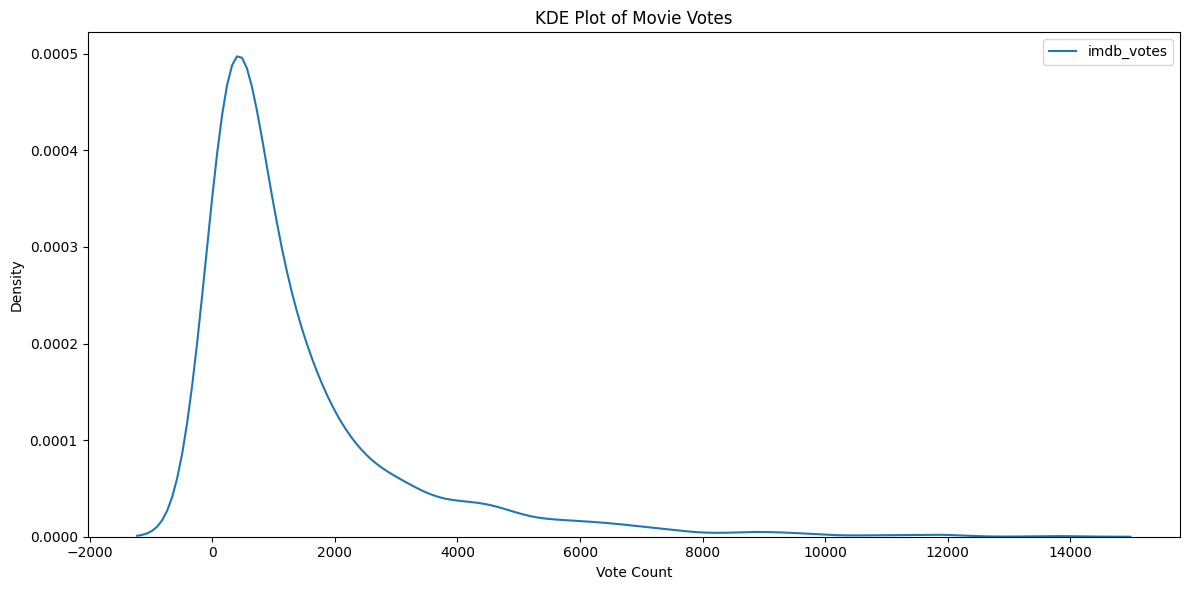

In [39]:
plt.figure(figsize=(12, 6))

# KDE plot using seaborn
sns.kdeplot(
    data=movie_stats,
    x='vote_count',
    label='imdb_votes'
)

plt.title('KDE Plot of Movie Votes')
plt.xlabel('Vote Count')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


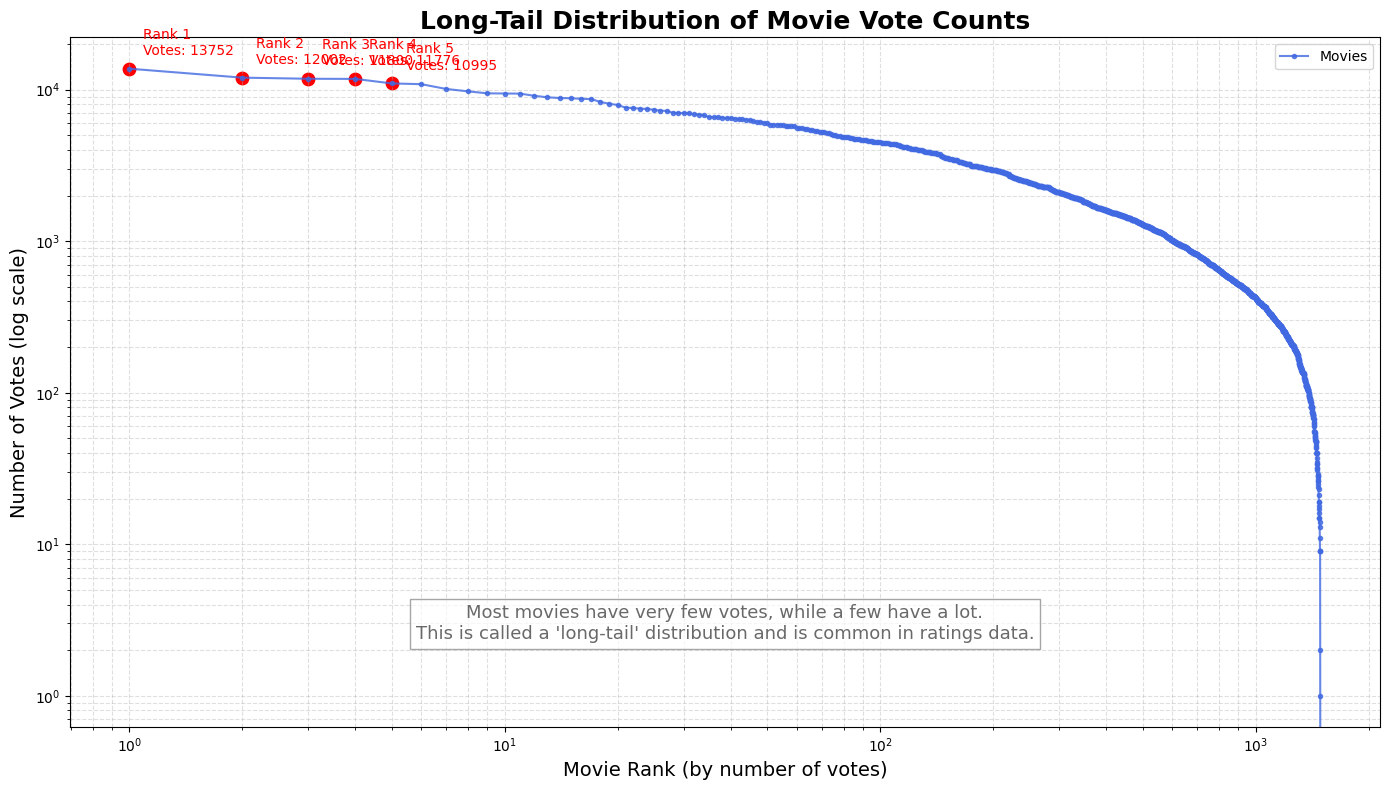

In [40]:
# Get the vote counts for each movie and sort in descending order
movie_vote_counts = movie_stats['vote_count'].sort_values(ascending=False)

# Create a rank for each movie based on number of votes
ranks = range(1, len(movie_vote_counts) + 1)

plt.figure(figsize=(14, 8))
plt.loglog(ranks, movie_vote_counts, marker='.', color='royalblue', alpha=0.8, label='Movies')

# Highlight the top 5 movies
for i in range(5):
    plt.scatter(ranks[i], movie_vote_counts.iloc[i], color='red', s=80)
    plt.annotate(
        f"Rank {i+1}\nVotes: {movie_vote_counts.iloc[i]}",
        (ranks[i], movie_vote_counts.iloc[i]),
        textcoords="offset points",
        xytext=(10, 10),
        ha='left',
        fontsize=10,
        color='red'
    )

# Add a text box explanation
plt.gca().text(
    0.5, 0.15,
    "Most movies have very few votes, while a few have a lot.\n"
    "This is called a 'long-tail' distribution and is common in ratings data.",
    fontsize=13,
    color='dimgray',
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

plt.title('Long-Tail Distribution of Movie Vote Counts', fontsize=18, weight='bold')
plt.xlabel('Movie Rank (by number of votes)', fontsize=14)
plt.ylabel('Number of Votes (log scale)', fontsize=14)
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
movies.columns

Index(['genres', 'id', 'keywords', 'original_language', 'overview',
       'release_date', 'runtime', 'title', 'vote_average', 'vote_count',
       'cast', 'crew', 'rating_group'],
      dtype='object')

In [42]:
movies

,genres,id,keywords,original_language,overview,release_date,runtime,title,vote_average,vote_count,cast,crew,rating_group
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,2015-10-26,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,2012-07-16,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",2012-03-07,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,"[{""id"": 18, ""name"": ""Drama""}]",9763,"[{""id"": 1946, ""name"": ""restaurant""}, {""id"": 60...",en,"Like millions of kids around the world, Santia...",2005-06-06,118.0,Goal!: The Dream Begins,6.6,238,"[{""cast_id"": 1, ""character"": ""Santiago Munez"",...","[{""credit_id"": ""52fe4528c3a36847f80bfa1d"", ""de...",6
1488,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",72387,"[{""id"": 180366, ""name"": ""broken trachea""}]",en,After a former elite agent rescues a 12-year-o...,2012-04-16,94.0,Safe,6.3,799,"[{""cast_id"": 3, ""character"": ""Luke Wright"", ""c...","[{""credit_id"": ""52fe4868c3a368484e0f716d"", ""de...",6
1489,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",12596,"[{""id"": 271, ""name"": ""competition""}, {""id"": 82...",en,"Two air traffic controllers (John Cusack, Bill...",1999-04-23,124.0,Pushing Tin,5.7,116,"[{""cast_id"": 1, ""character"": ""Nick Falzone"", ""...","[{""credit_id"": ""52fe45039251416c75048bc1"", ""de...",5
1490,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,Gang-du is a dim-witted man working at his fat...,2006-07-27,119.0,The Host,6.7,537,"[{""cast_id"": 52, ""character"": ""Melanie Stryder...","[{""credit_id"": ""52fe487bc3a368484e0fa919"", ""de...",6


In [43]:
# Process 'keywords' column
def convert_keywords(obj):
    l = []
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

movies['keywords'] = movies['keywords'].apply(convert_keywords)

In [44]:
type(movies['keywords'][0])

list

In [45]:
# Process 'genres' column
def convert_genres(obj):
    l = []
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

movies['genres'] = movies['genres'].apply(convert_genres)

In [46]:
type(movies['genres'][0])

list

In [47]:
# Process 'cast' column (top 3 only)
def extract_cast(obj):
    l = []
    count = 0
    for i in ast.literal_eval(obj):
        if count != 3:
            l.append(i['name'])
            count += 1
        else:
            break
    return l

movies['cast'] = movies['cast'].apply(extract_cast)

In [48]:
type(movies['cast'][0])

list

In [49]:
movies['crew'] = movies['crew'].apply(lambda x: [x] if x is not None else [])

In [50]:
# def extract_director(obj):
#     try:
#         data = ast.literal_eval(obj)
#         return next((i["name"] for i in data if i["job"] == "Director"), None)
#     except (SyntaxError, ValueError):
#         return None
# movies['crew'] = movies['crew'].apply(extract_director)

In [51]:
type(movies['crew'][0])

list

In [52]:
# Process 'overview' column
movies['overview'] = movies['overview'].apply(lambda x: x.split())

In [53]:
type(movies['overview'][0])

list

In [54]:
movies.columns

Index(['genres', 'id', 'keywords', 'original_language', 'overview',
       'release_date', 'runtime', 'title', 'vote_average', 'vote_count',
       'cast', 'crew', 'rating_group'],
      dtype='object')

In [55]:
# Create 'tags' column by combining overview + keywords + genres + cast + crew
movies['tags'] = movies['overview'] + movies['cast'] + movies['crew'] + movies['keywords'] + movies['genres']

In [56]:
# Remove spaces from tags
movies['tags'] = movies['tags'].apply(lambda x: [i.replace(" ", "") for i in x])

In [57]:
# Final dataset with relevant columns
movies = movies[['id', 'title', 'tags', 'original_language', 'release_date', 'runtime', 'vote_average', 'vote_count', 'rating_group']]
movies

,id,title,tags,original_language,release_date,runtime,vote_average,vote_count,rating_group
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",en,2009-12-10,162.0,7.2,11800,7
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",en,2007-05-19,169.0,6.9,4500,6
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",en,2015-10-26,148.0,6.3,4466,6
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",en,2012-07-16,165.0,7.6,9106,7
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",en,2012-03-07,132.0,6.1,2124,6
...,...,...,...,...,...,...,...,...,...
1487,9763,Goal!: The Dream Begins,"[Like, millions, of, kids, around, the, world,...",en,2005-06-06,118.0,6.6,238,6
1488,72387,Safe,"[After, a, former, elite, agent, rescues, a, 1...",en,2012-04-16,94.0,6.3,799,6
1489,12596,Pushing Tin,"[Two, air, traffic, controllers, (John, Cusack...",en,1999-04-23,124.0,5.7,116,5
1490,1255,The Host,"[Gang-du, is, a, dim-witted, man, working, at,...",ko,2006-07-27,119.0,6.7,537,6


In [58]:
# Remove spaces from tags
movies['tags'] = movies['tags'].apply(lambda x: [i.replace(" ", "") for i in x])

<ipython-input-58-f539d6fc2418>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['tags'].apply(lambda x: [i.replace(" ", "") for i in x])


In [59]:
movies.head(3)

,id,title,tags,original_language,release_date,runtime,vote_average,vote_count,rating_group
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",en,2009-12-10,162.0,7.2,11800,7
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",en,2007-05-19,169.0,6.9,4500,6
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",en,2015-10-26,148.0,6.3,4466,6


In [60]:
# Stemming
ps = PorterStemmer()

def stemming(text):
    l = []
    for i in text:
        l.append(ps.stem(i))
    return " ".join(l)

movies['tags'] = movies['tags'].apply(stemming)

<ipython-input-60-019f380a4049>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['tags'].apply(stemming)


In [61]:
movies

,id,title,tags,original_language,release_date,runtime,vote_average,vote_count,rating_group
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",en,2009-12-10,162.0,7.2,11800,7
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",en,2007-05-19,169.0,6.9,4500,6
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,en,2015-10-26,148.0,6.3,4466,6
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,en,2012-07-16,165.0,7.6,9106,7
4,49529,John Carter,"john carter is a war-weary, former militari ca...",en,2012-03-07,132.0,6.1,2124,6
...,...,...,...,...,...,...,...,...,...
1487,9763,Goal!: The Dream Begins,"like million of kid around the world, santiago...",en,2005-06-06,118.0,6.6,238,6
1488,72387,Safe,after a former elit agent rescu a 12-year-old ...,en,2012-04-16,94.0,6.3,799,6
1489,12596,Pushing Tin,"two air traffic control (john cusack, billi bo...",en,1999-04-23,124.0,5.7,116,5
1490,1255,The Host,gang-du is a dim-wit man work at hi father' ti...,ko,2006-07-27,119.0,6.7,537,6


In [62]:
tfidf = TfidfVectorizer(max_features= 500, stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['tags']).toarray()

In [63]:
tfidf_similarity = cosine_similarity(tfidf_matrix)

# **TFIDF Model**

In [64]:
# Computing WCSS (inertia) for k=1 to 10
wcss = []
k_range = range(1, 11)  # Test k from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(tfidf_matrix)  # Use your TF-IDF matrix here
    wcss.append(kmeans.inertia_)

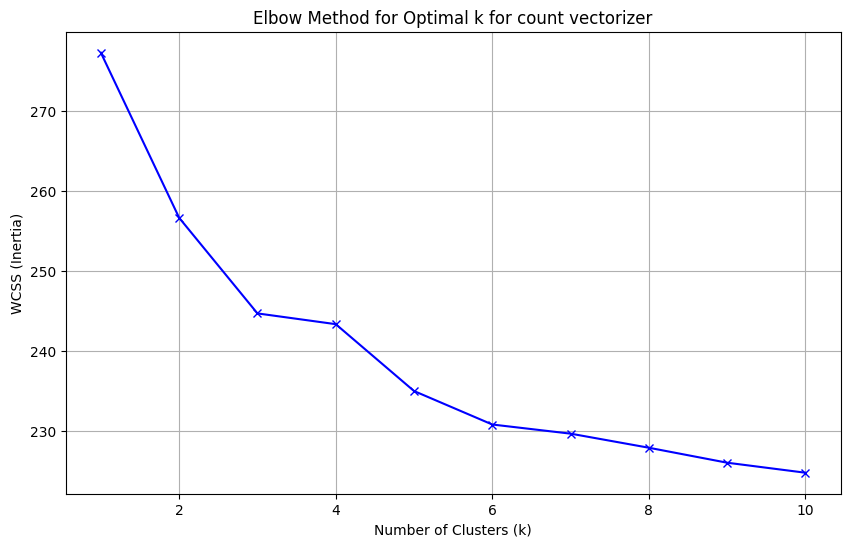

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k for count vectorizer')
plt.grid(True)
plt.show()

In [66]:
# Cluster with KMeans
kmeans_tfidf = KMeans(n_clusters=4, random_state=0)
clusters = kmeans_tfidf.fit_predict(tfidf_matrix)

In [67]:
# t-SNE
tsne_tfidf = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_result_tfidf = tsne_tfidf.fit_transform(tfidf_matrix)

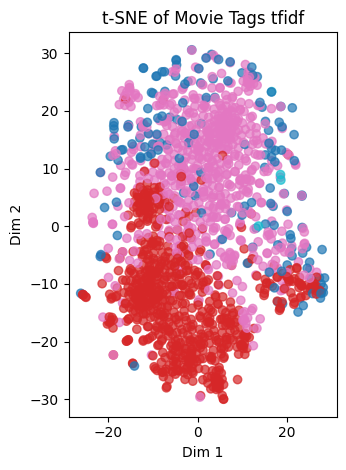

In [68]:
# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result_tfidf[:, 0], tsne_result_tfidf[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.title('t-SNE of Movie Tags tfidf')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

plt.tight_layout()
plt.show()

In [69]:
def cluster_enhanced_recommendations_tfidf(movie_title, top_n=10):
    movie_index = movies[movies['title'] == movie_title].index[0]
    movie_cluster = clusters[movie_index]
    # Filter movies to the same cluster
    cluster_movies = movies[clusters == movie_cluster]
    # Compute similarity only within the cluster
    distances = sorted(list(enumerate(tfidf_similarity[movie_index])), reverse=True, key=lambda x: x[1])
    # Get recommendations from the same cluster
    recommendations = [i for i in distances if clusters[i[0]] == movie_cluster]
    return [movies.iloc[i[0]].title for i in recommendations[1:top_n+1]]

In [70]:
print(f"These recommendations for the movie Avatar with tfidf", cluster_enhanced_recommendations_tfidf("Avatar"));

These recommendations for the movie Avatar with tfidf ['The Hunger Games: Mockingjay - Part 1', "Ender's Game", 'The Day After Tomorrow', 'Captain America: The First Avenger', 'Cloud Atlas', 'The Hobbit: The Battle of the Five Armies', 'Fast Five', 'Deep Blue Sea', 'Jupiter Ascending', 'Edge of Tomorrow']


In [71]:
def plot_recommendations_tsne_tfidf(movie_title, tsne_result_tfidf):
    movie_index = movies[movies['title'] == movie_title].index[0]
    distances = sorted(list(enumerate(tfidf_similarity[movie_index])), reverse=True, key=lambda x: x[1])
    recommended_indices = [i[0] for i in distances[1:6]]  # Get top 5 recommendations

    # Get the cluster of the query movie
    movie_cluster = clusters[movie_index]

    plt.figure(figsize=(10, 8))

    # Plot all movies as background (lightgrey)
    plt.scatter(tsne_result_tfidf[:, 0], tsne_result_tfidf[:, 1], c='lightgrey', alpha=0.5)

    # Highlight the cluster the query movie belongs to (lightblue)
    plt.scatter(
        tsne_result_tfidf[clusters == movie_cluster, 0],
        tsne_result_tfidf[clusters == movie_cluster, 1],
        c='lightblue',
        alpha=0.3,
        label=f'Cluster {movie_cluster}'
    )

    # Plot query movie (red star)
    plt.scatter(
        tsne_result_tfidf[movie_index, 0],
        tsne_result_tfidf[movie_index, 1],
        c='red',
        s=200,
        marker='*',
        label='Selected Movie'
    )

    # Plot recommendations (blue dots)
    plt.scatter(
        tsne_result_tfidf[recommended_indices, 0],
        tsne_result_tfidf[recommended_indices, 1],
        c='blue',
        s=100,
        label='Recommendations'
    )

    plt.title(f'Recommendations for tfidf "{movie_title}" in t-SNE Space (Cluster Highlighted)')
    plt.legend()
    plt.show()

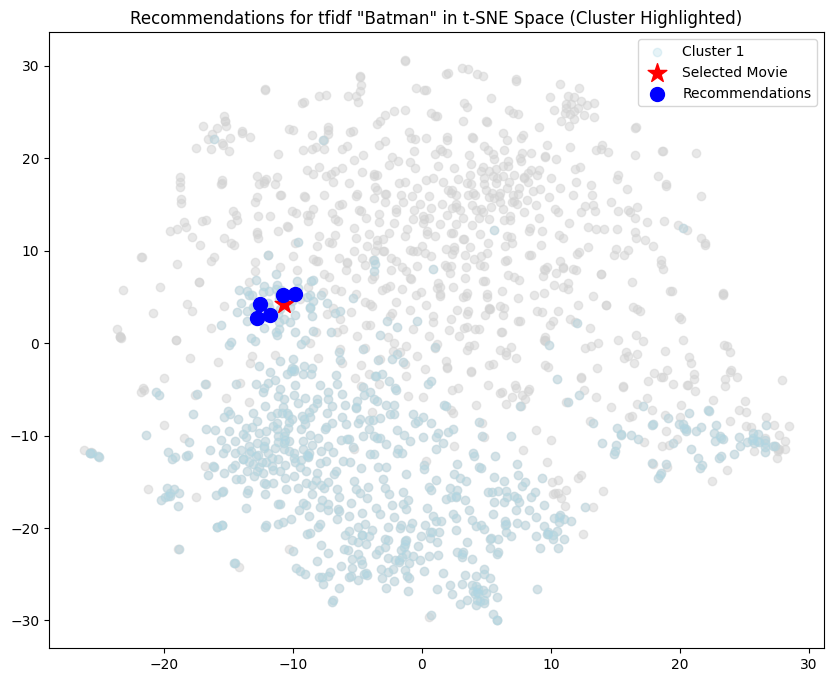

In [72]:
plot_recommendations_tsne_tfidf('Batman', tsne_result_tfidf)

In [73]:
def avg_similarity_score_tfidf(movie_title, top_n=5):
    movie_index = movies[movies['title'] == movie_title].index[0]
    distances = sorted(list(enumerate(tfidf_similarity[movie_index])), reverse=True, key=lambda x: x[1])

    similarity_scores = [i[1] for i in distances[1:top_n+1]]  # Exclude the movie itself
    return sum(similarity_scores) / len(similarity_scores)

In [74]:
avg_similarity_score_tfidf("Batman")

np.float64(0.9782893190492962)

# **Count Vectorizer Model**

In [75]:
# Vectorization
vectorizer = CountVectorizer(max_features=500, stop_words='english')
vectors = vectorizer.fit_transform(movies['tags']).toarray()

In [76]:
# Cosine similarity
count_similarity = cosine_similarity(vectors)

In [77]:
# Computing WCSS (inertia) for k=1 to 10
wcss_count = []
k_range = range(1, 11)  # Test k from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(vectors)  # Using count matrix here
    wcss_count.append(kmeans.inertia_)

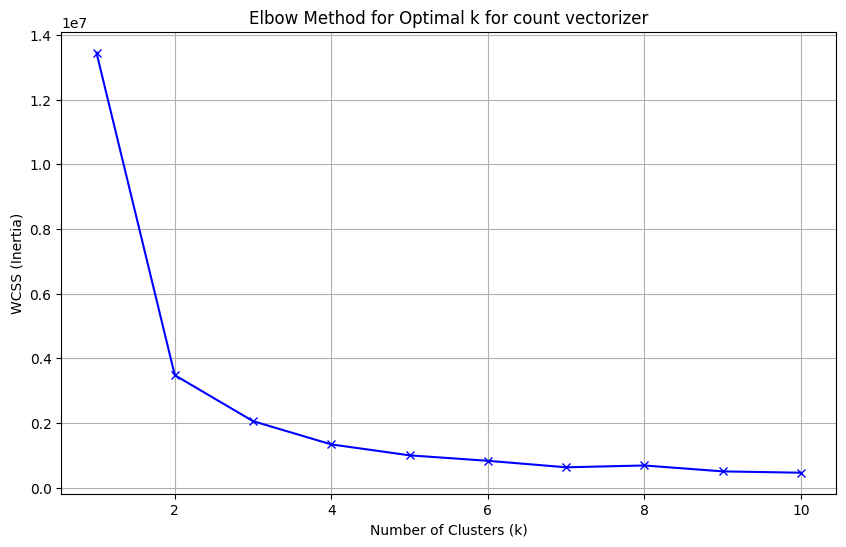

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_count, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k for count vectorizer')
plt.grid(True)
plt.show()

In [79]:
# t-SNE
tsne_count = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_count_result = tsne_count.fit_transform(vectors)

In [80]:
# Cluster with KMeans
kmeans_count = KMeans(n_clusters=2, random_state=0)
count_clusters = kmeans_count.fit_predict(vectors)

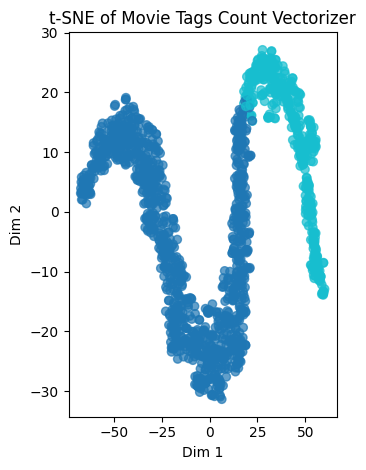

In [81]:
# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_count_result[:, 0], tsne_count_result[:, 1], c=count_clusters, cmap='tab10', alpha=0.7)
plt.title('t-SNE of Movie Tags Count Vectorizer')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

plt.tight_layout()
plt.show()

In [82]:
def cluster_enhanced_recommendations_count(movie_title, top_n=10):
    movie_index = movies[movies['title'] == movie_title].index[0]
    movie_cluster = count_clusters[movie_index]
    # Filter movies to the same cluster
    cluster_movies = movies[count_clusters == movie_cluster]
    # Compute similarity only within the cluster
    distances = sorted(list(enumerate(count_similarity[movie_index])), reverse=True, key=lambda x: x[1])
    # Get recommendations from the same cluster
    recommendations = [i for i in distances if clusters[i[0]] == movie_cluster]
    return [movies.iloc[i[0]].title for i in recommendations[1:top_n+1]]

In [83]:
print(f"These recommendations for the movie Avatar with count_vectorizer", cluster_enhanced_recommendations_count("Avatar"));

These recommendations for the movie Avatar with count_vectorizer ["Ender's Game", 'The Hunger Games: Mockingjay - Part 1', 'The Day After Tomorrow', 'Cloud Atlas', 'The Hobbit: The Battle of the Five Armies', 'Dredd', 'Jupiter Ascending', '2012', 'Contact', 'Deep Blue Sea']


In [84]:
def plot_recommendations_tsne_count(movie_title, tsne_result_tfidf):
    movie_index = movies[movies['title'] == movie_title].index[0]
    distances = sorted(list(enumerate(count_similarity[movie_index])), reverse=True, key=lambda x: x[1])
    recommended_indices = [i[0] for i in distances[1:6]]  # Get top 5 recommendations

    # Get the cluster of the query movie
    movie_cluster = count_clusters[movie_index]

    plt.figure(figsize=(10, 8))

    # Plot all movies as background (lightgrey)
    plt.scatter(tsne_count_result[:, 0], tsne_count_result[:, 1], c='lightgrey', alpha=0.5)

    # Highlight the cluster the query movie belongs to (lightblue)
    plt.scatter(
        tsne_count_result[count_clusters == movie_cluster, 0],
        tsne_count_result[count_clusters == movie_cluster, 1],
        c='lightblue',
        alpha=0.3,
        label=f'Cluster {movie_cluster}'
    )

    # Plot query movie (red star)
    plt.scatter(
        tsne_count_result[movie_index, 0],
        tsne_count_result[movie_index, 1],
        c='red',
        s=200,
        marker='*',
        label='Selected Movie'
    )

    # Plot recommendations (blue dots)
    plt.scatter(
        tsne_count_result[recommended_indices, 0],
        tsne_count_result[recommended_indices, 1],
        c='blue',
        s=100,
        label='Recommendations'
    )

    plt.title(f'Recommendations for count vectorizer"{movie_title}" in t-SNE Space (Cluster Highlighted)')
    plt.legend()
    plt.show()

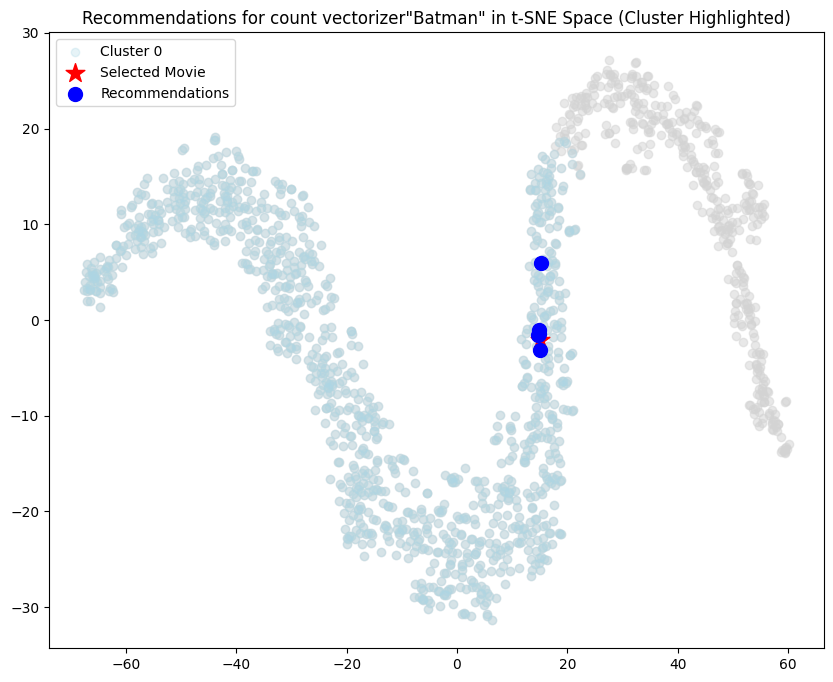

In [85]:
plot_recommendations_tsne_count('Batman', tsne_count_result)

In [86]:
# Save the model and data
pickle.dump(movies, open('model.pkl', 'wb'))
pickle.dump(count_similarity, open('count_similarity.pkl', 'wb'))
pickle.dump(tfidf_similarity, open('tfidf_similarity.pkl', 'wb'))